In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

You can only unpack the zipped tuple once before it's removed from the memory
<br>when you run `list(lat_lngs)` you get an empty list

In [8]:
list(lat_lngs)

[]

In [9]:
coordinates[:10]

[(21.2804816281035, 147.15631615132048),
 (12.92965429363744, -9.721050700714272),
 (-33.75240004500913, 50.80465293606218),
 (-78.45499808481577, 22.47571212266311),
 (26.842389619345198, -169.31923556360422),
 (-76.3418227956528, -66.21448046255423),
 (10.511211780328054, 146.31478785733498),
 (-38.80413761529436, -3.4312123613138397),
 (70.67719428681104, 46.881287186956456),
 (-41.9889782095245, -61.34828836736585)]

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates[:5]:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

katsuura jp
kita ml
taolanaro mg
bredasdorp za
kapaa us


In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

g Record 28 of Set 4 | preili
Processing Record 29 of Set 4 | saint anthony
Processing Record 30 of Set 4 | gravdal
Processing Record 31 of Set 4 | estacion coahuila
Processing Record 32 of Set 4 | skagen
Processing Record 33 of Set 4 | port hardy
Processing Record 34 of Set 4 | touros
Processing Record 35 of Set 4 | westport
Processing Record 36 of Set 4 | port lincoln
Processing Record 37 of Set 4 | estelle
Processing Record 38 of Set 4 | magdagachi
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | diego de almagro
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | manta
Processing Record 45 of Set 4 | imbituba
Processing Record 46 of Set 4 | malvern
Processing Record 47 of Set 4 | moerai
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | ulladulla
Processing Record 50 of Set 4 | umzimvubu
City not found. Skipp

In [16]:
len(city_data)

593

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.13,140.30,66.20,68,75,14.99,JP,2020-09-29 13:47:11
1,Kita,13.03,-9.49,89.94,56,9,8.12,ML,2020-09-29 13:48:13
2,Bredasdorp,-34.53,20.04,64.40,45,40,17.22,ZA,2020-09-29 13:43:58
3,Kapaa,22.08,-159.32,73.40,88,1,6.93,US,2020-09-29 13:46:56
4,Ushuaia,-54.80,-68.30,33.80,74,75,18.34,AR,2020-09-29 13:46:47
5,Airai,-8.93,125.41,59.79,94,50,2.80,TL,2020-09-29 13:47:05
6,Saldanha,-33.01,17.94,64.40,64,40,17.22,ZA,2020-09-29 13:47:22
7,Mezen,65.85,44.24,50.47,81,1,5.82,RU,2020-09-29 13:48:13
8,Viedma,-40.81,-63.00,62.01,46,100,5.01,AR,2020-09-29 13:45:21
9,Mataura,-46.19,168.86,39.99,84,95,10.00,NZ,2020-09-29 13:46:59


In [18]:
# re-order the columns as required
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2020-09-29 13:47:11,35.13,140.30,66.20,68,75,14.99
1,Kita,ML,2020-09-29 13:48:13,13.03,-9.49,89.94,56,9,8.12
2,Bredasdorp,ZA,2020-09-29 13:43:58,-34.53,20.04,64.40,45,40,17.22
3,Kapaa,US,2020-09-29 13:46:56,22.08,-159.32,73.40,88,1,6.93
4,Ushuaia,AR,2020-09-29 13:46:47,-54.80,-68.30,33.80,74,75,18.34
...,...,...,...,...,...,...,...,...,...
588,Itaituba,BR,2020-09-29 13:50:42,-4.28,-55.98,87.80,62,0,5.82
589,Kibala,TD,2020-09-29 13:50:42,9.11,18.35,89.60,59,40,2.24
590,Damghan,IR,2020-09-29 13:50:42,36.17,54.35,62.40,36,95,9.57
591,Corinto,GR,2020-09-29 13:50:43,37.94,22.96,77.00,51,0,15.01


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        593 non-null    object 
 1   Country     593 non-null    object 
 2   Date        593 non-null    object 
 3   Lat         593 non-null    float64
 4   Lng         593 non-null    float64
 5   Max Temp    593 non-null    float64
 6   Humidity    593 non-null    int64  
 7   Cloudiness  593 non-null    int64  
 8   Wind Speed  593 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 41.8+ KB


In [21]:
city_data_ReadFromFile_df = pd.read_csv("weather_data/cities.csv") 

In [22]:
city_data_ReadFromFile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     593 non-null    int64  
 1   City        593 non-null    object 
 2   Country     591 non-null    object 
 3   Date        593 non-null    object 
 4   Lat         593 non-null    float64
 5   Lng         593 non-null    float64
 6   Max Temp    593 non-null    float64
 7   Humidity    593 non-null    int64  
 8   Cloudiness  593 non-null    int64  
 9   Wind Speed  593 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 46.5+ KB


In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
# this module will allow to get the current date
import time
# Get today's date in seconds.
today = time.time()
today

1601387907.6552749

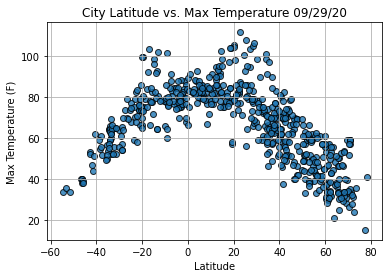

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

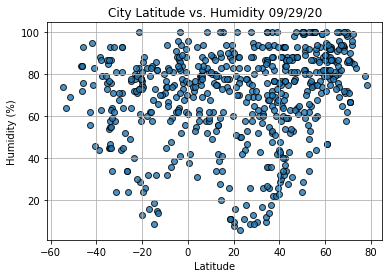

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

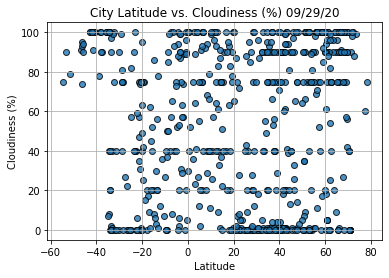

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

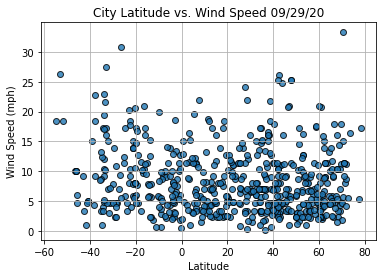

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()